In [1]:
import numpy as np
import pandas as pd
import scipy.io as sio 
import os
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.patches import Rectangle
from sklearn.model_selection import train_test_split

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers


C:\Users\USER\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Data preprocessing

In [2]:
new_train_path = 'Dataset/new_cars_train/'
new_test_path = 'Dataset/new_cars_test/'


train_datagen = ImageDataGenerator(
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.15,
        zoom_range=0.15,
        validation_split = 0.15,
        horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
        new_train_path,
        target_size=(224, 224),
        batch_size=16,
        seed = 42,
        shuffle = True,
        subset = 'training',
        class_mode='categorical')

validation_generator = train_datagen.flow_from_directory(
        new_train_path,
        target_size=(224, 224),
        batch_size=16,
        seed = 42,
        shuffle = True,
        subset = 'validation',
        class_mode='categorical')

Found 7018 images belonging to 196 classes.
Found 1126 images belonging to 196 classes.


## Fine-tune using EfficientnetB0

In [3]:
# Options: EfficientNetB0, EfficientNetB1, EfficientNetB2, EfficientNetB3
# Higher the number, the more complex the model is.
from efficientnet import EfficientNetB0 as Net
from efficientnet import center_crop_and_resize, preprocess_input


In [4]:
# loading pretrained conv base model
conv_base = Net(weights="imagenet", include_top=False)
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'multiply_16':
        set_trainable = True
        if set_trainable:
            layer.trainable = True
        else:
            layer.trainable = False


efficientnet_model = Sequential()
efficientnet_model.add(conv_base)

efficientnet_model.add(Flatten())
efficientnet_model.add(Dense(512))
efficientnet_model.add(Activation('relu'))
efficientnet_model.add(Dropout(0.2))
efficientnet_model.add(Dense(196, activation='softmax'))

efficientnet_model.compile(optimizers.rmsprop(lr=0.0001),
    loss="categorical_crossentropy", metrics=["accuracy"])

STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size

history = efficientnet_model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=validation_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=150)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Shapes are always computed; don't use the compute_shapes as it has no effect.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/150
438/438 [==============================] - 368s 840ms/step - loss: 4.8777 - acc: 0.0753 - val_loss: 3.5364 - val_acc: 0.2455
Epoch 2/150
438/438 [==============================] - 342s 782ms/step - loss: 2.6992 - acc: 0.3823 - val_loss: 2.2248 - val_acc: 0.4766
Epoch 3/150
438/438 [==============================] - 342s 781ms/step - loss: 1.4432 - acc: 0.6343 - val_loss: 1.7983 - val_acc: 0.5649
Epoch 4/150
438/438 [==============================] - 341s 779ms/step - loss: 0.8522 - acc: 0.7779 - val_loss: 1.7011 - val_acc: 0.6081
Epoch 5/150
438/438 [=============

438/438 [==============================] - 341s 779ms/step - loss: 0.1053 - acc: 0.9762 - val_loss: 2.5386 - val_acc: 0.7351
Epoch 50/150
438/438 [==============================] - 341s 777ms/step - loss: 0.1051 - acc: 0.9765 - val_loss: 1.5648 - val_acc: 0.7955
Epoch 51/150
438/438 [==============================] - 341s 779ms/step - loss: 0.0984 - acc: 0.9790 - val_loss: 2.0197 - val_acc: 0.7676
Epoch 52/150
438/438 [==============================] - 341s 778ms/step - loss: 0.0810 - acc: 0.9799 - val_loss: 1.5826 - val_acc: 0.7775
Epoch 53/150
438/438 [==============================] - 341s 778ms/step - loss: 0.0824 - acc: 0.9827 - val_loss: 1.8099 - val_acc: 0.7721
Epoch 54/150
438/438 [==============================] - 341s 778ms/step - loss: 0.0904 - acc: 0.9812 - val_loss: 1.9193 - val_acc: 0.7658
Epoch 55/150
438/438 [==============================] - 341s 778ms/step - loss: 0.1004 - acc: 0.9795 - val_loss: 2.0476 - val_acc: 0.7631
Epoch 56/150
438/438 [=========================

438/438 [==============================] - 341s 779ms/step - loss: 0.0718 - acc: 0.9863 - val_loss: 1.8426 - val_acc: 0.7919
Epoch 109/150
438/438 [==============================] - 341s 779ms/step - loss: 0.0725 - acc: 0.9860 - val_loss: 1.7158 - val_acc: 0.8063
Epoch 110/150
438/438 [==============================] - 341s 780ms/step - loss: 0.0667 - acc: 0.9874 - val_loss: 1.7823 - val_acc: 0.8072
Epoch 111/150
438/438 [==============================] - 341s 779ms/step - loss: 0.0814 - acc: 0.9859 - val_loss: 2.2248 - val_acc: 0.7748
Epoch 112/150
438/438 [==============================] - 341s 779ms/step - loss: 0.0812 - acc: 0.9853 - val_loss: 1.7875 - val_acc: 0.8090
Epoch 113/150
438/438 [==============================] - 341s 779ms/step - loss: 0.0730 - acc: 0.9863 - val_loss: 1.8984 - val_acc: 0.7901
Epoch 114/150
438/438 [==============================] - 342s 780ms/step - loss: 0.0799 - acc: 0.9857 - val_loss: 1.6561 - val_acc: 0.8243
Epoch 115/150
438/438 [==================

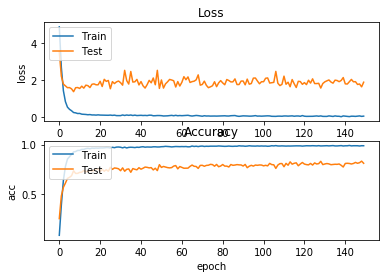

In [5]:
import matplotlib.pyplot as plt
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train', 'Test'], loc='upper left')

# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Save .h5

In [6]:
efficientnet_model.save('effnet_final_150.h5')

## Load model

In [7]:
from keras.models import load_model

model = load_model('effnet_final_150.h5')

## Validate with train data set

In [8]:
STEPS=validation_generator.n//validation_generator.batch_size
prediction = model.predict_generator(validation_generator, steps=STEPS)

In [9]:
prediction

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.41026003e-35, 0.00000000e+00],
       [2.18265652e-15, 7.66829395e-12, 1.51837667e-10, ...,
        4.97179880e-14, 9.99701023e-01, 3.58982913e-16],
       [2.07896528e-17, 2.71770584e-09, 2.62278976e-10, ...,
        6.10590476e-15, 1.09483574e-17, 9.12118297e-17],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.84573077e-25, 1.41166769e-23, 1.40677889e-26, ...,
        6.38919525e-26, 1.42916932e-30, 1.75847542e-26],
       [1.58884367e-26, 2.51246685e-28, 1.56463937e-35, ...,
        4.13340557e-29, 1.04343563e-21, 3.44561418e-22]], dtype=float32)

In [10]:
score = model.evaluate_generator(validation_generator, steps = 10)

In [11]:
print('Loss:',score[0])

Loss: 1.581439718057712


In [12]:
print('Accuracy:',score[1])

Accuracy: 0.8666666674613953


## Prediction with confidence

In [13]:

name = []
label = []
conf1 = []
conf2 = []
conf3 = []
pred1 = []
pred2 = []
pred3 = []

for index in range(validation_generator.n):

    image, Label = validation_generator._get_batches_of_transformed_samples(np.array([index]))

    # label and name
    image_name = validation_generator.filenames[index]
    l_n = image_name.split('\\')
    label.append(int(l_n[0]))
    name.append(str(l_n[1]))

    pred = model.predict_on_batch(image)
    temp = pred[0].copy()

    pred1.append(int(np.argmax(temp)))
    conf1.append(temp[np.argmax(temp)])
    temp[np.argmax(temp)] = 0

    pred2.append(int(np.argmax(temp)))
    conf2.append(temp[np.argmax(temp)])
    temp[np.argmax(temp)] = 0

    
    pred3.append(int(np.argmax(temp)))
    conf3.append(temp[np.argmax(temp)])
    temp[np.argmax(temp)] = 0


In [14]:
df = pd.DataFrame({'filename':name, 'labels':label, 
                   'pred1':pred1, 'conf1':conf1,
                   'pred2':pred2, 'conf2':conf2,
                   'pred3':pred3, 'conf3':conf3})

In [15]:
df.head(20)

,filename,labels,pred1,conf1,pred2,conf2,pred3,conf3
0,1276.jpg,0,0,1.000000,52,4.482351e-17,59,6.360861e-20
1,162.jpg,0,29,0.989381,0,1.061911e-02,28,1.276763e-09
2,1660.jpg,0,0,1.000000,29,1.238543e-07,28,3.057550e-09
3,1831.jpg,0,0,1.000000,27,5.363800e-14,52,1.842256e-18
4,1917.jpg,0,0,1.000000,29,1.145431e-21,19,2.262872e-23
5,1951.jpg,0,0,1.000000,52,4.118919e-10,29,4.488437e-12
6,1030.jpg,1,1,1.000000,32,1.631053e-18,75,9.514491e-21
7,1033.jpg,1,1,0.979200,31,2.079952e-02,94,3.385791e-11
8,1534.jpg,1,1,1.000000,31,2.692574e-15,94,2.478765e-23
9,1890.jpg,1,1,0.990283,13,6.413820e-03,112,2.273245e-03


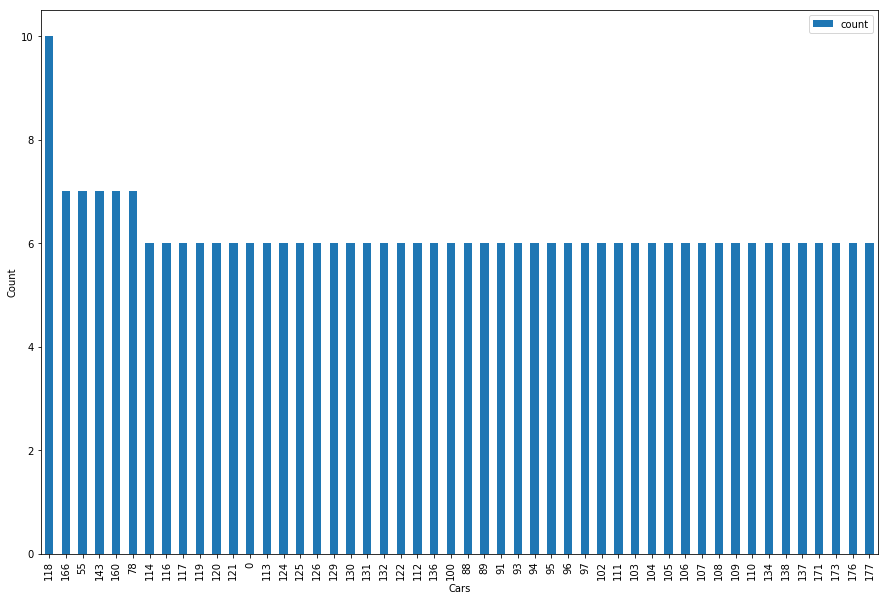

In [16]:
freq_labels = df.groupby('labels').count()[['filename']]
freq_labels = freq_labels.rename(columns={'filename': 'count'})
freq_labels = freq_labels.sort_values(by='count', ascending=False)

freq_labels.head(50).plot.bar(figsize=(15,10))
plt.xticks(rotation=90);
plt.xlabel("Cars");
plt.ylabel("Count");

In [17]:
count = 0
for i,j in zip(label, pred1):
    if i==j:
        count += 1

print('Accuracy:',str(count)+'/'+str(len(label)))

Accuracy: 11/1126


# Result

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# accuracy from using keras.evaluate_generator
print('Keras_accuracy: {0:.6f}'.format(score[1]))

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(label, pred1)
print('Accuracy: {0:.6f}'.format(accuracy))

# precision tp / (tp + fp)
precision = precision_score(label, pred1, labels=np.unique(pred1), average = 'micro')
print('Precision: {0:.6f}'.format(precision))

# recall: tp / (tp + fn)
recall = recall_score(label, pred1, labels=np.unique(pred1), average = 'micro')
print('Recall: {0:.6f}'.format(recall))

# f1: 2*(Recall * Precision) / (Recall + Precision)
f1 = f1_score(label, pred1, labels=np.unique(pred1), average= 'weighted')
print('F1: {0:.6f}'.format(f1))

Keras_accuracy: 0.866667
Accuracy: 0.009769
Precision: 0.009769
Recall: 0.009769
F1: 0.009071
